In [1]:
# Import libraries and load dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Vstore Computer\Datasets\marketing_campaignc.csv')

### Data Understanding

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [6]:
df = df.rename(columns={
    "ID":  "id",
    "Year_Birth":  "birth_year",
    "Education":  "education",
    "Marital_Status":  "marital_status",
    "Income":  "income",
    "Kidhome":  "kid_home",
    "Teenhome":  "teen_home",
    "Dt_Customer":  "customer_date",
    "Recency":  "recency",
    "MntWines":  "minutes_wines",
    "MntFruits": "minutes_fruits",
    "MntMeatProducts": "minutes_meat_products",
    "MntFishProducts": "minutes_fish_products",
    "MntSweetProducts": "minutes_sweet_products",
    "MntGoldProds": "minutes_gold_products",
    "NumDealsPurchases": "num_deal_purchases",
    "NumWebPurchases": "num_web_purchases",
    "NumCatalogPurchases": "num_catalog_purchases",
    "NumStorePurchases": "num_store_purchases",
    "NumWebVisitsMonth": "num_web_visit_months",
    "AcceptedCmp3": "acc_campaign3",
    "AcceptedCmp4": "acc_campaign4",
    "AcceptedCmp5": "acc_campaign5",
    "AcceptedCmp1": "acc_campaign1",
    "AcceptedCmp2": "acc_campaign2",
    "Complain": "complain",
    "Z_CostContact": "contact_cost",
    "Z_Revenue": "revenue",
    "Response": "target"
})

if "target" not in df.columns:
    raise KeyError(f"'target' column missing! Available columns: {df.columns.tolist()}")
else:
    print("✅ Target column found and ready for modeling!")

✅ Target column found and ready for modeling!


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
birth_year,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
kid_home,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teen_home,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
minutes_wines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
minutes_fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
minutes_meat_products,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
minutes_fish_products,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2240 non-null   int64  
 1   birth_year              2240 non-null   int64  
 2   education               2240 non-null   object 
 3   marital_status          2240 non-null   object 
 4   income                  2216 non-null   float64
 5   kid_home                2240 non-null   int64  
 6   teen_home               2240 non-null   int64  
 7   customer_date           2240 non-null   object 
 8   recency                 2240 non-null   int64  
 9   minutes_wines           2240 non-null   int64  
 10  minutes_fruits          2240 non-null   int64  
 11  minutes_meat_products   2240 non-null   int64  
 12  minutes_fish_products   2240 non-null   int64  
 13  minutes_sweet_products  2240 non-null   int64  
 14  minutes_gold_products   2240 non-null   

### Data Preparation

#### Data Cleaning

In [9]:
df.isna().sum()

id                         0
birth_year                 0
education                  0
marital_status             0
income                    24
kid_home                   0
teen_home                  0
customer_date              0
recency                    0
minutes_wines              0
minutes_fruits             0
minutes_meat_products      0
minutes_fish_products      0
minutes_sweet_products     0
minutes_gold_products      0
num_deal_purchases         0
num_web_purchases          0
num_catalog_purchases      0
num_store_purchases        0
num_web_visit_months       0
acc_campaign3              0
acc_campaign4              0
acc_campaign5              0
acc_campaign1              0
acc_campaign2              0
complain                   0
contact_cost               0
revenue                    0
target                     0
dtype: int64

In [10]:
df['income'] = df['income'].fillna(df['income'].mean())

In [11]:
df.isna().sum()

id                        0
birth_year                0
education                 0
marital_status            0
income                    0
kid_home                  0
teen_home                 0
customer_date             0
recency                   0
minutes_wines             0
minutes_fruits            0
minutes_meat_products     0
minutes_fish_products     0
minutes_sweet_products    0
minutes_gold_products     0
num_deal_purchases        0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visit_months      0
acc_campaign3             0
acc_campaign4             0
acc_campaign5             0
acc_campaign1             0
acc_campaign2             0
complain                  0
contact_cost              0
revenue                   0
target                    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['income'] = df['income'].fillna(df['income'].mean())

In [14]:
df.isna().sum()

id                        0
birth_year                0
education                 0
marital_status            0
income                    0
kid_home                  0
teen_home                 0
customer_date             0
recency                   0
minutes_wines             0
minutes_fruits            0
minutes_meat_products     0
minutes_fish_products     0
minutes_sweet_products    0
minutes_gold_products     0
num_deal_purchases        0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visit_months      0
acc_campaign3             0
acc_campaign4             0
acc_campaign5             0
acc_campaign1             0
acc_campaign2             0
complain                  0
contact_cost              0
revenue                   0
target                    0
dtype: int64

In [15]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called id has 2240 unique values
Column called birth_year has 59 unique values
Column called education has 5 unique values
Column called marital_status has 8 unique values
Column called income has 1975 unique values
Column called kid_home has 3 unique values
Column called teen_home has 3 unique values
Column called customer_date has 663 unique values
Column called recency has 100 unique values
Column called minutes_wines has 776 unique values
Column called minutes_fruits has 158 unique values
Column called minutes_meat_products has 558 unique values
Column called minutes_fish_products has 182 unique values
Column called minutes_sweet_products has 177 unique values
Column called minutes_gold_products has 213 unique values
Column called num_deal_purchases has 15 unique values
Column called num_web_purchases has 15 unique values
Column called num_catalog_purchases has 14 unique values
Column called num_store_purchases has 14 unique values
Column called num_web_visit_months has 16 u

--- education ---
education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

--- marital_status ---
marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

--- kid_home ---
kid_home
0    1293
1     899
2      48
Name: count, dtype: int64

--- teen_home ---
teen_home
0    1158
1    1030
2      52
Name: count, dtype: int64

--- complain ---
complain
0    2219
1      21
Name: count, dtype: int64

--- target ---
target
0    1906
1     334
Name: count, dtype: int64



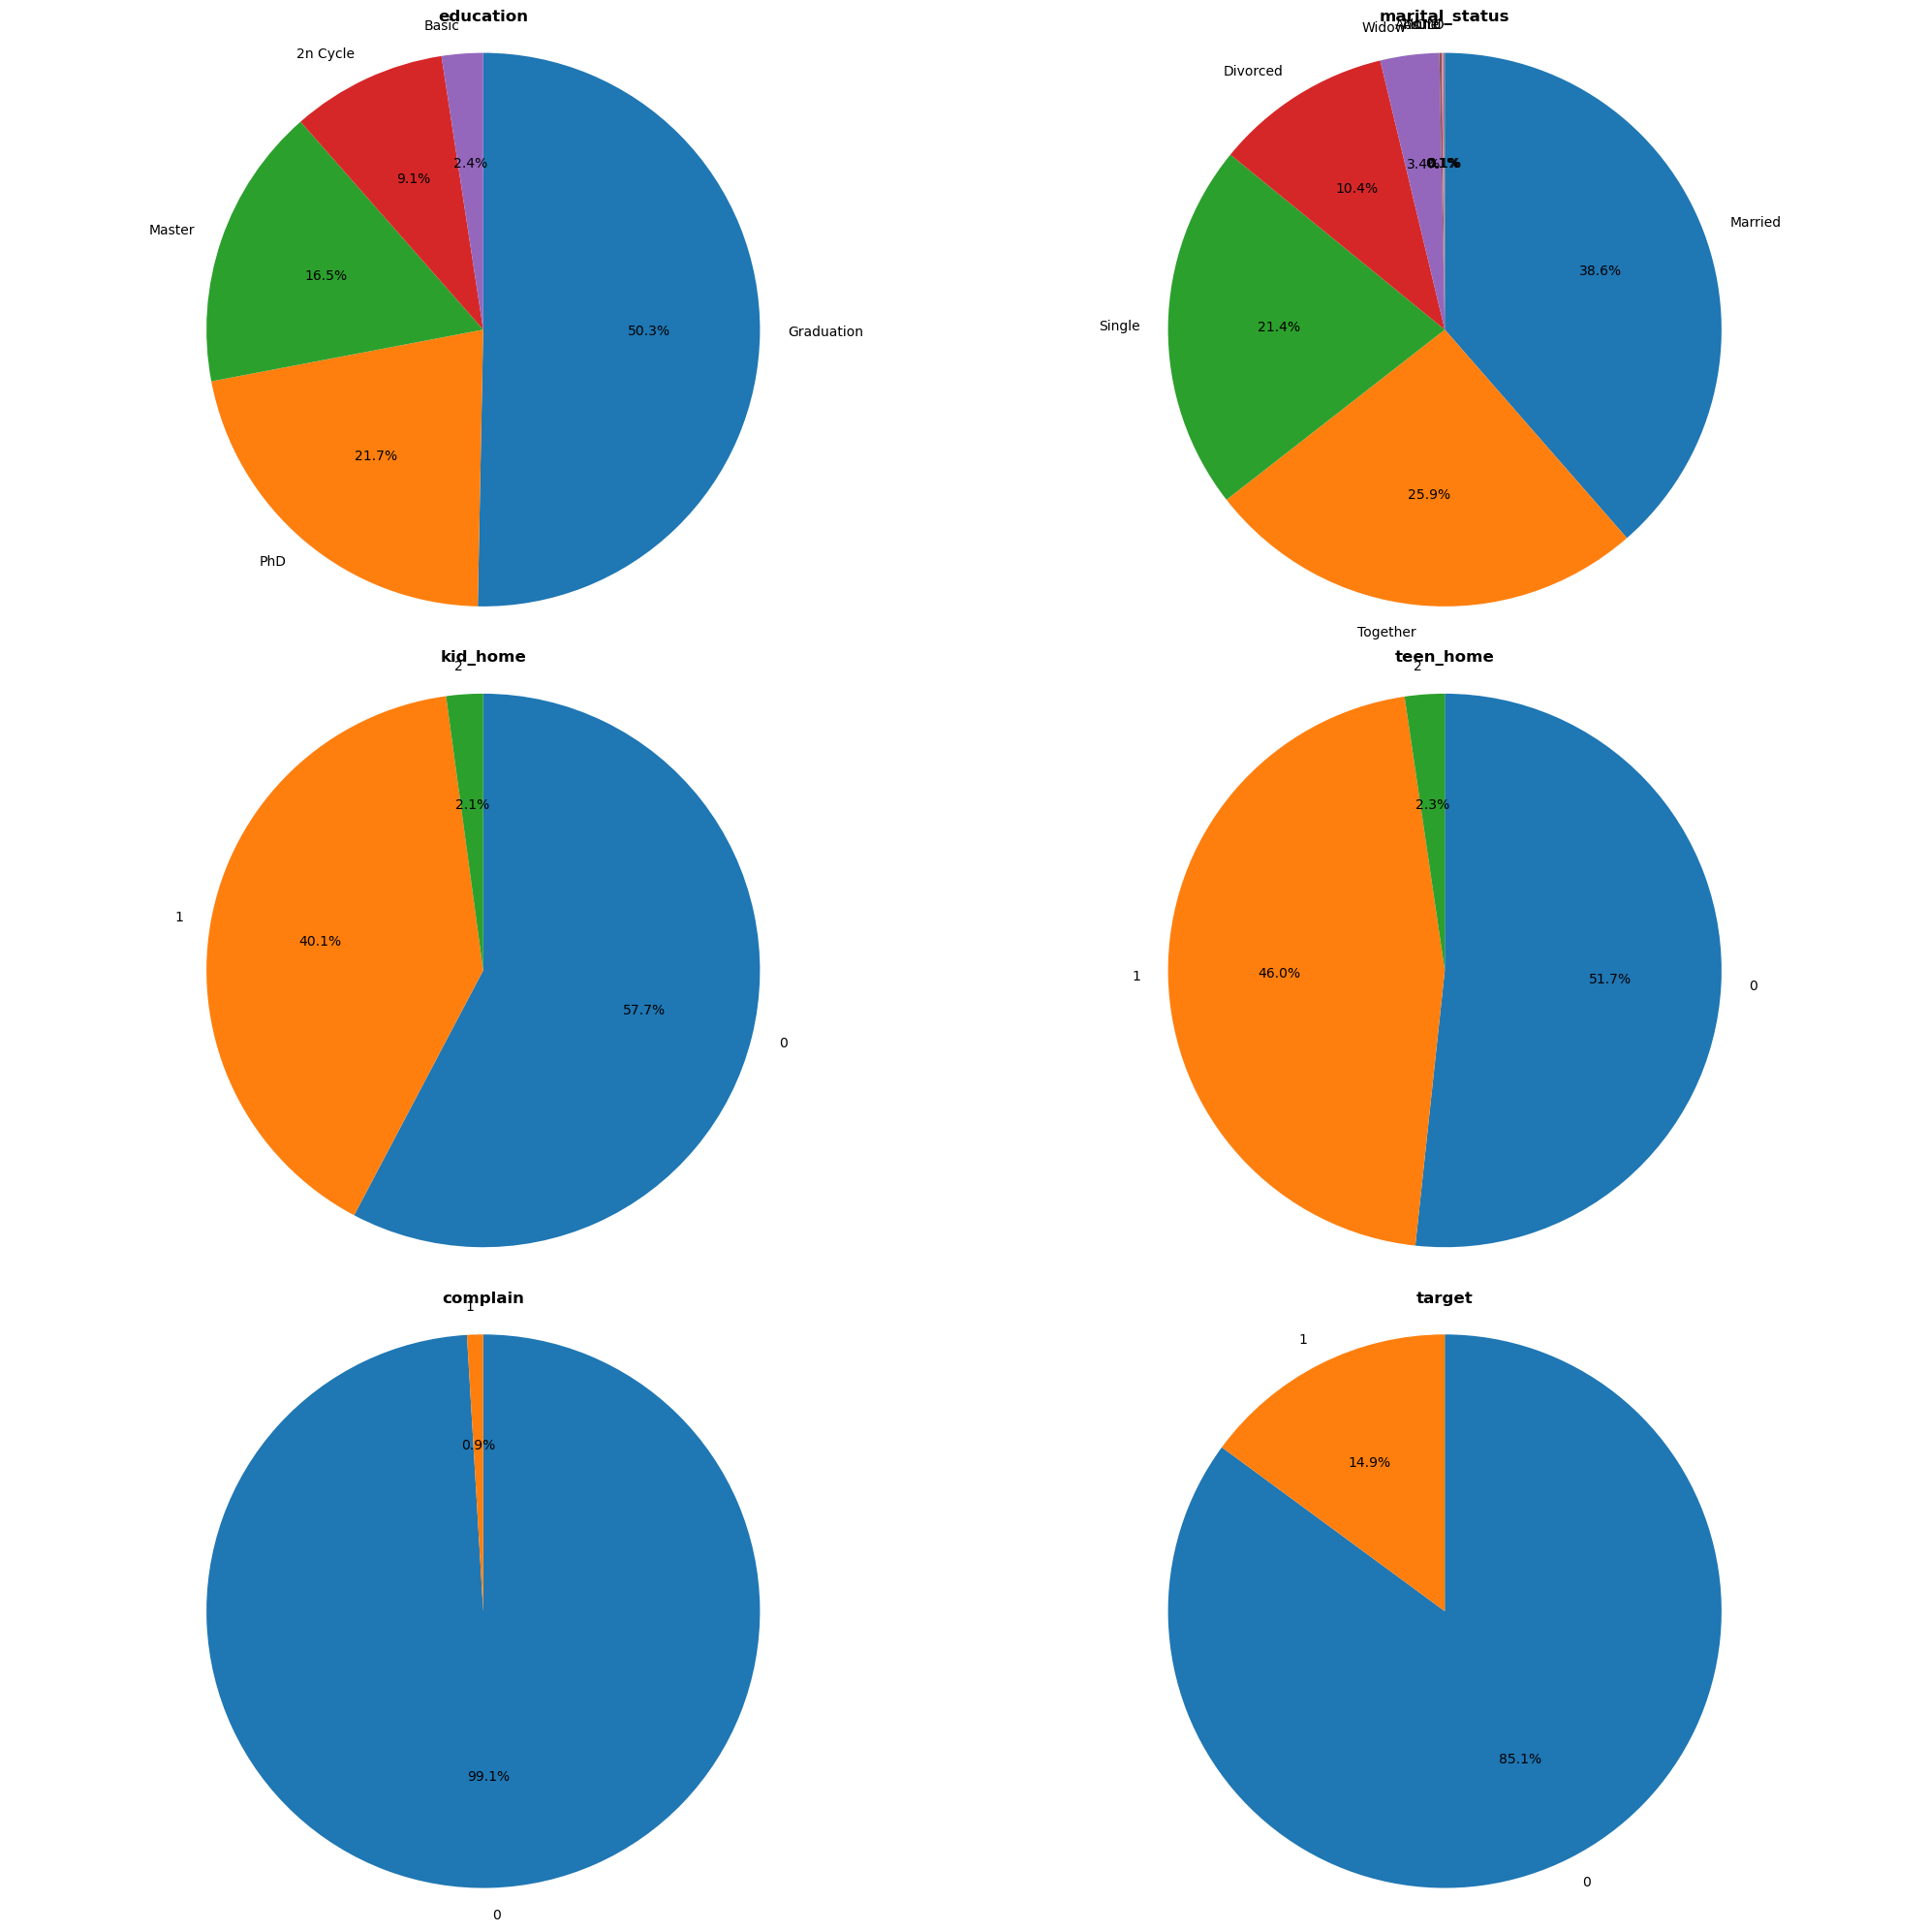

In [16]:
# List of categorical columns
columns = [
    'education', 'marital_status', 'kid_home', 'teen_home', 
    'complain', 'target'
]

# Define figure and grid
plt.figure(figsize=(20, 20))  

# Loop through columns
for i, col in enumerate(columns, 1):
    count_values = df[col].value_counts(dropna=False)  # Include NaN if any
    print(f"--- {col} ---")
    print(count_values, end="\n\n")

    # Subplot arrangement: 7 rows × 2 cols (14 plots total)
    plt.subplot(3, 2, i)
    plt.title(col, fontsize=12, fontweight="bold")
    
    # Pie chart
    plt.pie(
        count_values,
        labels=count_values.index.astype(str), 
        autopct="%1.1f%%",
        startangle=90,
        counterclock=False
    )
    plt.axis("equal") 

# Adjust layout
plt.tight_layout()
plt.show()


#### Feature Engineering

In [17]:
# Convert customer date to datetime
df['customer_date'] = pd.to_datetime(df['customer_date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2240 non-null   int64         
 1   birth_year              2240 non-null   int64         
 2   education               2240 non-null   object        
 3   marital_status          2240 non-null   object        
 4   income                  2240 non-null   float64       
 5   kid_home                2240 non-null   int64         
 6   teen_home               2240 non-null   int64         
 7   customer_date           2240 non-null   datetime64[ns]
 8   recency                 2240 non-null   int64         
 9   minutes_wines           2240 non-null   int64         
 10  minutes_fruits          2240 non-null   int64         
 11  minutes_meat_products   2240 non-null   int64         
 12  minutes_fish_products   2240 non-null   int64   

In [19]:
# Feature Engineering

# 1. Demographic 

# Current age 
df['age'] = 2025 - df['birth_year']

# Household composition
df['family_size'] = df['kid_home'] + df['teen_home'] + 2 # 2 means assuming two adults
df['has_kids'] = ((df['kid_home'] + df['teen_home']) > 0).astype(int)


# 2. Spending features

# Tatal minutes of spending all products
spend_cols = ['minutes_wines', 'minutes_fruits', 'minutes_meat_products', 'minutes_fish_products', 'minutes_sweet_products', 'minutes_gold_products']
df['total_spending'] = df[spend_cols].sum(axis=1)

for cols in spend_cols:
    share_col = cols.replace('minutes_','share_')
    df[share_col] = df[cols] / df['total_spending']
df.fillna(0, inplace=True)  # avoid div/0


# 3. Engagement

# Total numbers of all purchases
df['total_purchases'] = df['num_deal_purchases'] + df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases'] + df['num_web_visit_months']
df['online_purchase_ratio'] = (df['num_web_purchases']+df['num_catalog_purchases']) / df['total_purchases'].replace(0,1)
df['web_engagement'] = df['num_web_visit_months'] / (df['num_web_visit_months'] + df['num_web_purchases'] + 1)


# 4. Campaign

# Total campigns
campaign_cols = ['acc_campaign1', 'acc_campaign2', 'acc_campaign3', 'acc_campaign4', 'acc_campaign5']
df['campaigns_accepted'] = df[campaign_cols].sum(axis=1)
df['ever_accepted'] = (df['campaigns_accepted'] > 0).astype(int)

In [20]:
pd.set_option('display.max_columns', None)
print(df.head())

     id  birth_year   education marital_status   income  kid_home  teen_home  \
0  5524        1957  Graduation         Single  58138.0         0          0   
1  2174        1954  Graduation         Single  46344.0         1          1   
2  4141        1965  Graduation       Together  71613.0         0          0   
3  6182        1984  Graduation       Together  26646.0         1          0   
4  5324        1981         PhD        Married  58293.0         1          0   

  customer_date  recency  minutes_wines  minutes_fruits  \
0    2012-09-04       58            635              88   
1    2014-03-08       38             11               1   
2    2013-08-21       26            426              49   
3    2014-02-10       26             11               4   
4    2014-01-19       94            173              43   

   minutes_meat_products  minutes_fish_products  minutes_sweet_products  \
0                    546                    172                      88   
1             

In [21]:
print(df.shape)

(2240, 44)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2240 non-null   int64         
 1   birth_year              2240 non-null   int64         
 2   education               2240 non-null   object        
 3   marital_status          2240 non-null   object        
 4   income                  2240 non-null   float64       
 5   kid_home                2240 non-null   int64         
 6   teen_home               2240 non-null   int64         
 7   customer_date           2240 non-null   datetime64[ns]
 8   recency                 2240 non-null   int64         
 9   minutes_wines           2240 non-null   int64         
 10  minutes_fruits          2240 non-null   int64         
 11  minutes_meat_products   2240 non-null   int64         
 12  minutes_fish_products   2240 non-null   int64   

### Exploratory Data Analysis (EDA)
---

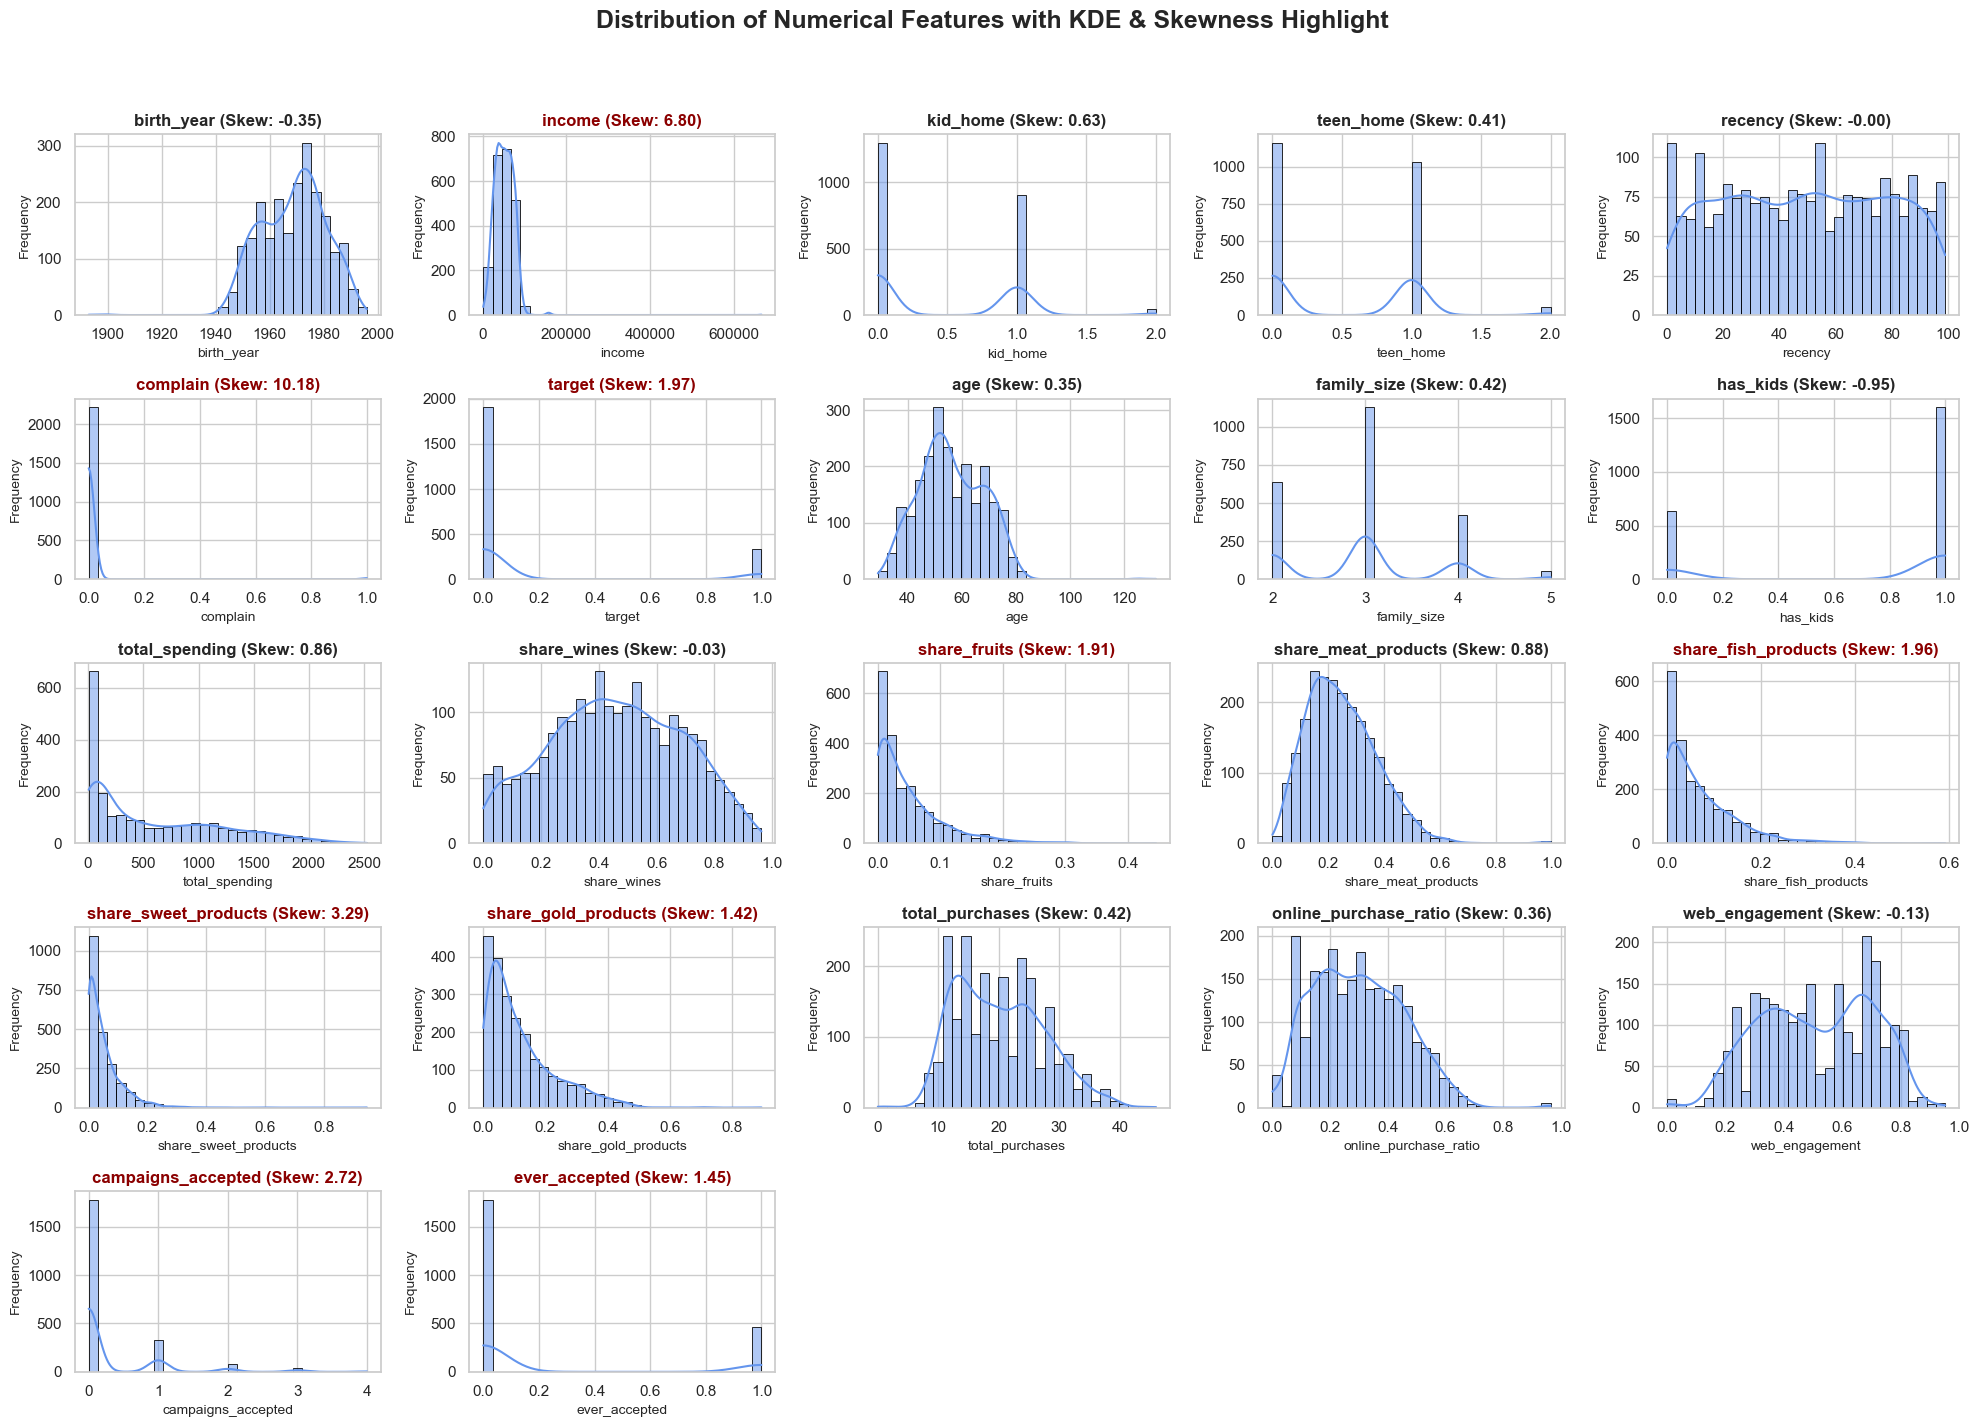

In [23]:
#  Feature Distributions
from scipy.stats import skew, uniform, randint, loguniform
# Set seaborn style for clean visuals
sns.set(style="whitegrid")

num_dtypes = ["int32", "int64", "float32", "float64"]
cate_dtypes = ["object", "category"]
# Select only numeric features
df_num = df.select_dtypes(include = num_dtypes)
columns_to_drop = ['id', 'minutes_wines', 'minutes_fruits', 'minutes_meat_products', 'minutes_fish_products', 'minutes_sweet_products', 'minutes_gold_products', 'num_deal_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visit_months', 'acc_campaign3', 'acc_campaign4', 'acc_campaign5', 'acc_campaign1', 'acc_campaign2', 'contact_cost', 'revenue']
df_num = df_num.drop(columns=columns_to_drop)

df_cate = df.select_dtypes(include = cate_dtypes)

num_cols = df_num.columns
cate_cols = df_cate.columns


# Calculate skewness for each feature
skewness = df[num_cols].apply(skew).sort_values(ascending=False)

# Set plot layout
n_cols = 5
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Plot histograms with KDE overlay and skewness info
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color='cornflowerblue', edgecolor='black', ax=axes[i])

    skew_val = skewness[col]
    skew_label = f" (Skew: {skew_val:.2f})"

    # Highlight skewed features with a red title
    if abs(skew_val) > 1:
        axes[i].set_title(f"{col}{skew_label}", fontsize=12, fontweight='bold', color='darkred')
    else:
        axes[i].set_title(f"{col}{skew_label}", fontsize=12, fontweight='bold')

    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global title
fig.suptitle('Distribution of Numerical Features with KDE & Skewness Highlight', 
             fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


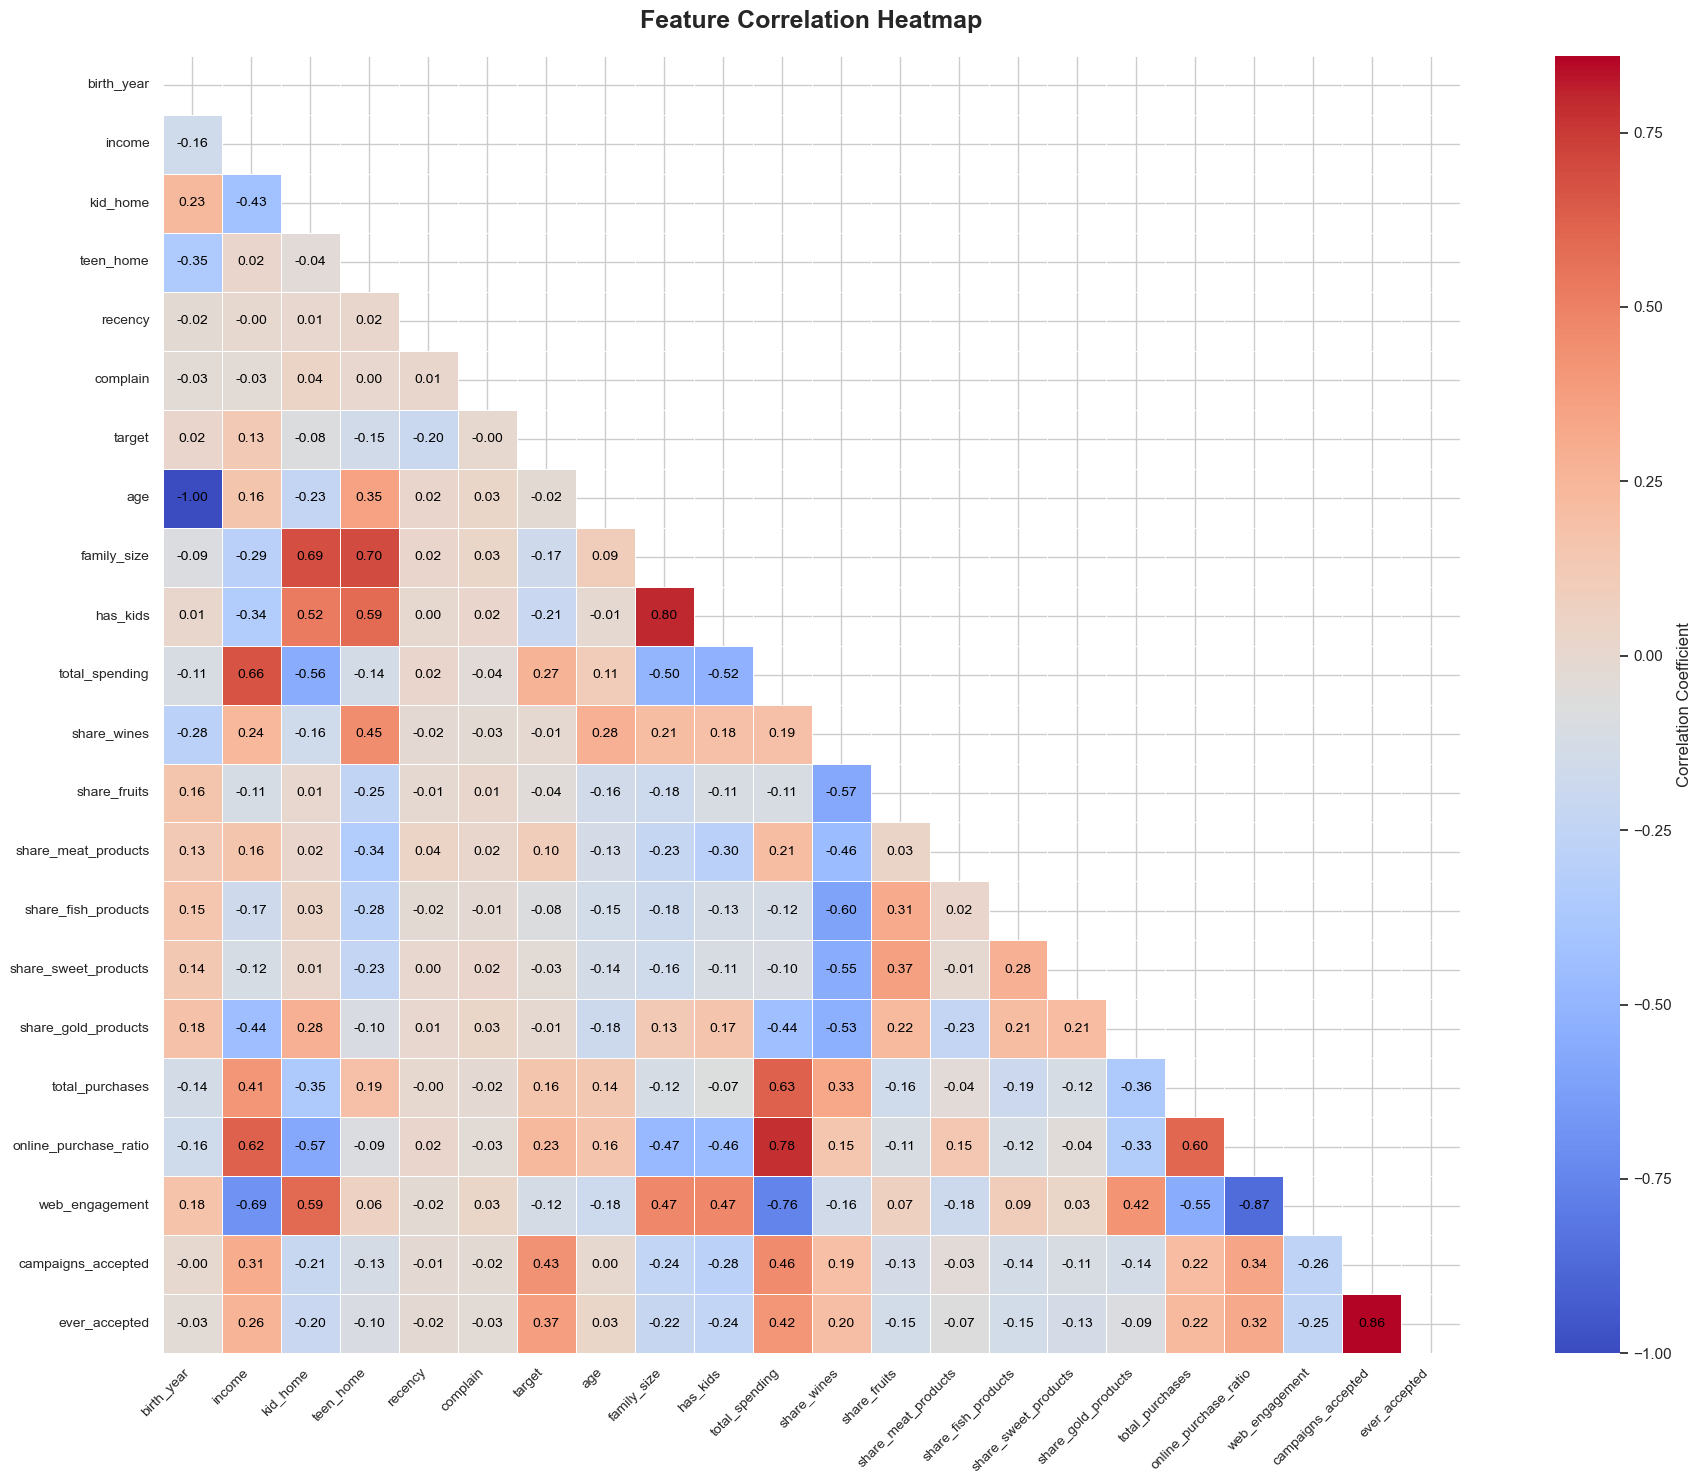

In [24]:
#  Correlation Heatmap

corr = df_num.corr()


# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with a mask for the upper triangle (optional for clarity)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr, 
    mask=mask,                      # hides upper triangle
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar_kws={'shrink': 1.0, 'label': 'Correlation Coefficient'},
    square=True, 
    linewidths=0.5, 
    annot_kws={"size": 10, "color": "black"}
)

# Title and aesthetics
plt.title("Feature Correlation Heatmap", fontsize=18, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2240 non-null   int64         
 1   birth_year              2240 non-null   int64         
 2   education               2240 non-null   object        
 3   marital_status          2240 non-null   object        
 4   income                  2240 non-null   float64       
 5   kid_home                2240 non-null   int64         
 6   teen_home               2240 non-null   int64         
 7   customer_date           2240 non-null   datetime64[ns]
 8   recency                 2240 non-null   int64         
 9   minutes_wines           2240 non-null   int64         
 10  minutes_fruits          2240 non-null   int64         
 11  minutes_meat_products   2240 non-null   int64         
 12  minutes_fish_products   2240 non-null   int64   

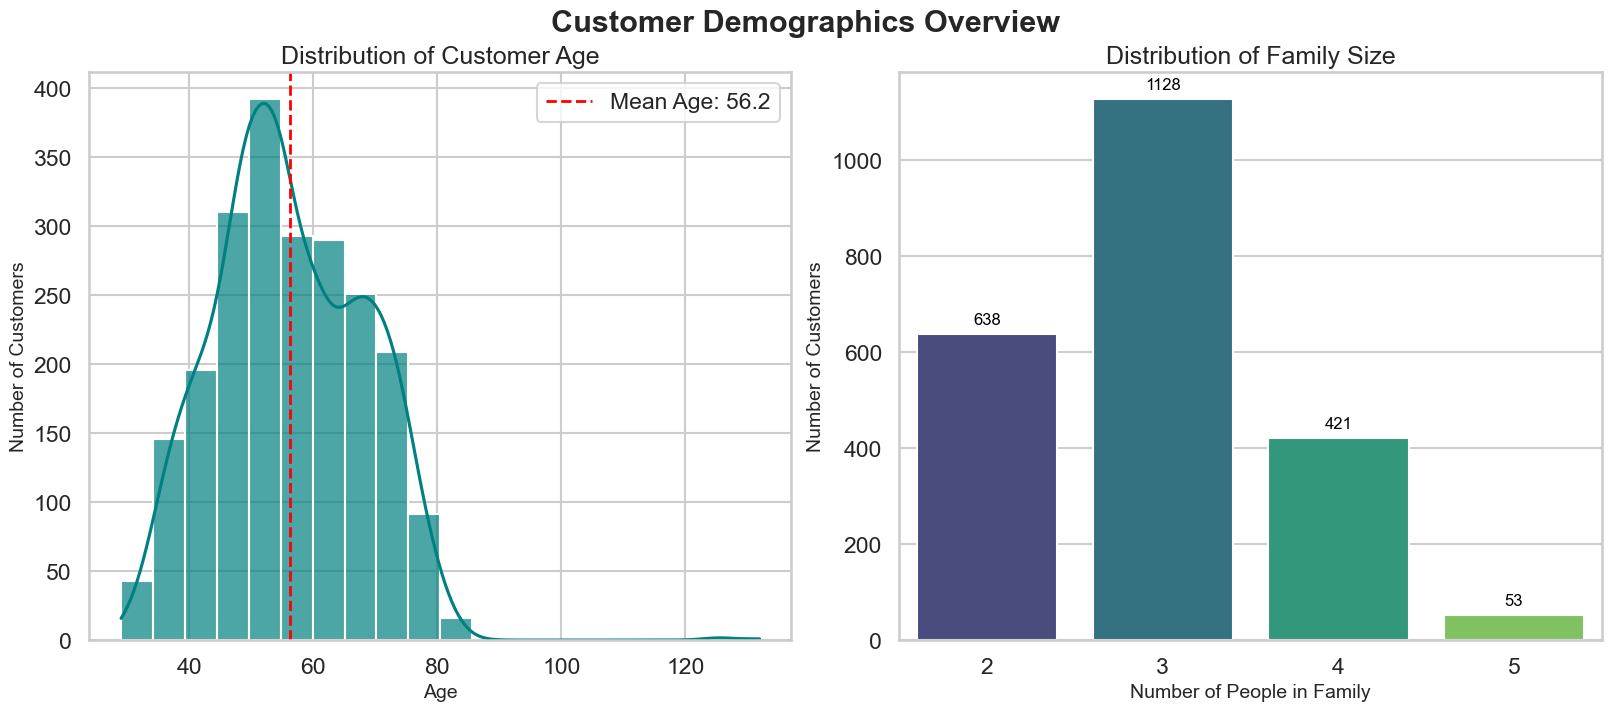

In [26]:
sns.set_style("whitegrid")
sns.set_context("talk") # Increases font sizes for better readability


fig, axes = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)
fig.suptitle('Customer Demographics Overview', fontsize=22, weight='bold')


# Age Distribution (Histogram)

sns.histplot(data=df, x='age', bins=20, kde=True, ax=axes[0], color="teal", alpha=0.7)
axes[0].set_title("Distribution of Customer Age", fontsize=18)
axes[0].set_xlabel("Age", fontsize=14)
axes[0].set_ylabel("Number of Customers", fontsize=14)


mean_age = df['age'].mean()
axes[0].axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
axes[0].legend() # Display the label for the mean age line


# Family Size Distribution (Count Plot)


family_size_order = sorted(df['family_size'].unique())

plot = sns.countplot(data=df, x="family_size", ax=axes[1], palette="viridis", order=family_size_order)
axes[1].set_title("Distribution of Family Size", fontsize=18)
axes[1].set_xlabel("Number of People in Family", fontsize=14)
axes[1].set_ylabel("Number of Customers", fontsize=14)


for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points',
                  fontsize=12,
                  color='black')


plt.show()

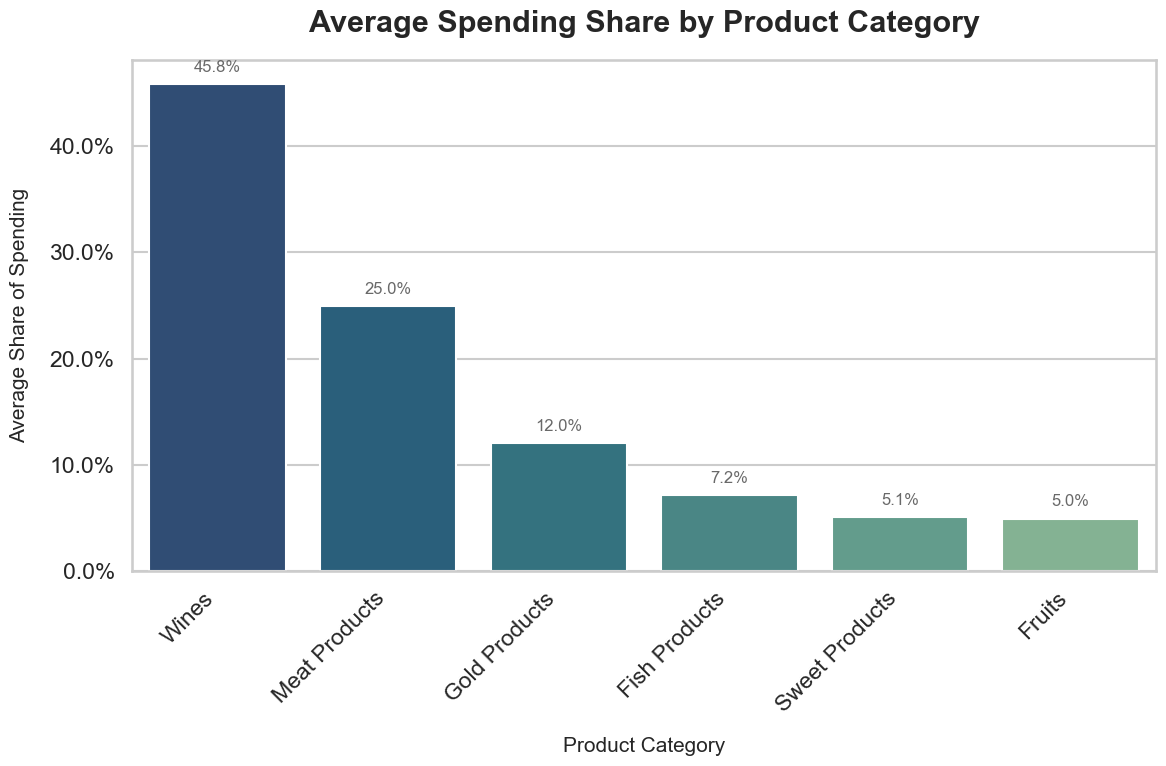

In [27]:
import matplotlib.ticker as mtick

share_cols = [c for c in df.columns if c.startswith("share_")]

avg_shares = df[share_cols].mean()
avg_shares.index = avg_shares.index.str.replace('share_', '', regex=False).str.replace('_', ' ').str.title()
avg_shares = avg_shares.sort_values(ascending=False)


sns.set_style("whitegrid")
sns.set_context("talk")


plt.figure(figsize=(12, 8))

ax = sns.barplot(x=avg_shares.index, y=avg_shares.values, palette="crest_r")


ax.set_title("Average Spending Share by Product Category", fontsize=22, weight='bold', pad=20)
ax.set_xlabel("Product Category", fontsize=15, labelpad=15)
ax.set_ylabel("Average Share of Spending", fontsize=15, labelpad=15)


ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',   
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 12),
                textcoords='offset points',
                fontsize=12,
                color='dimgray')


plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

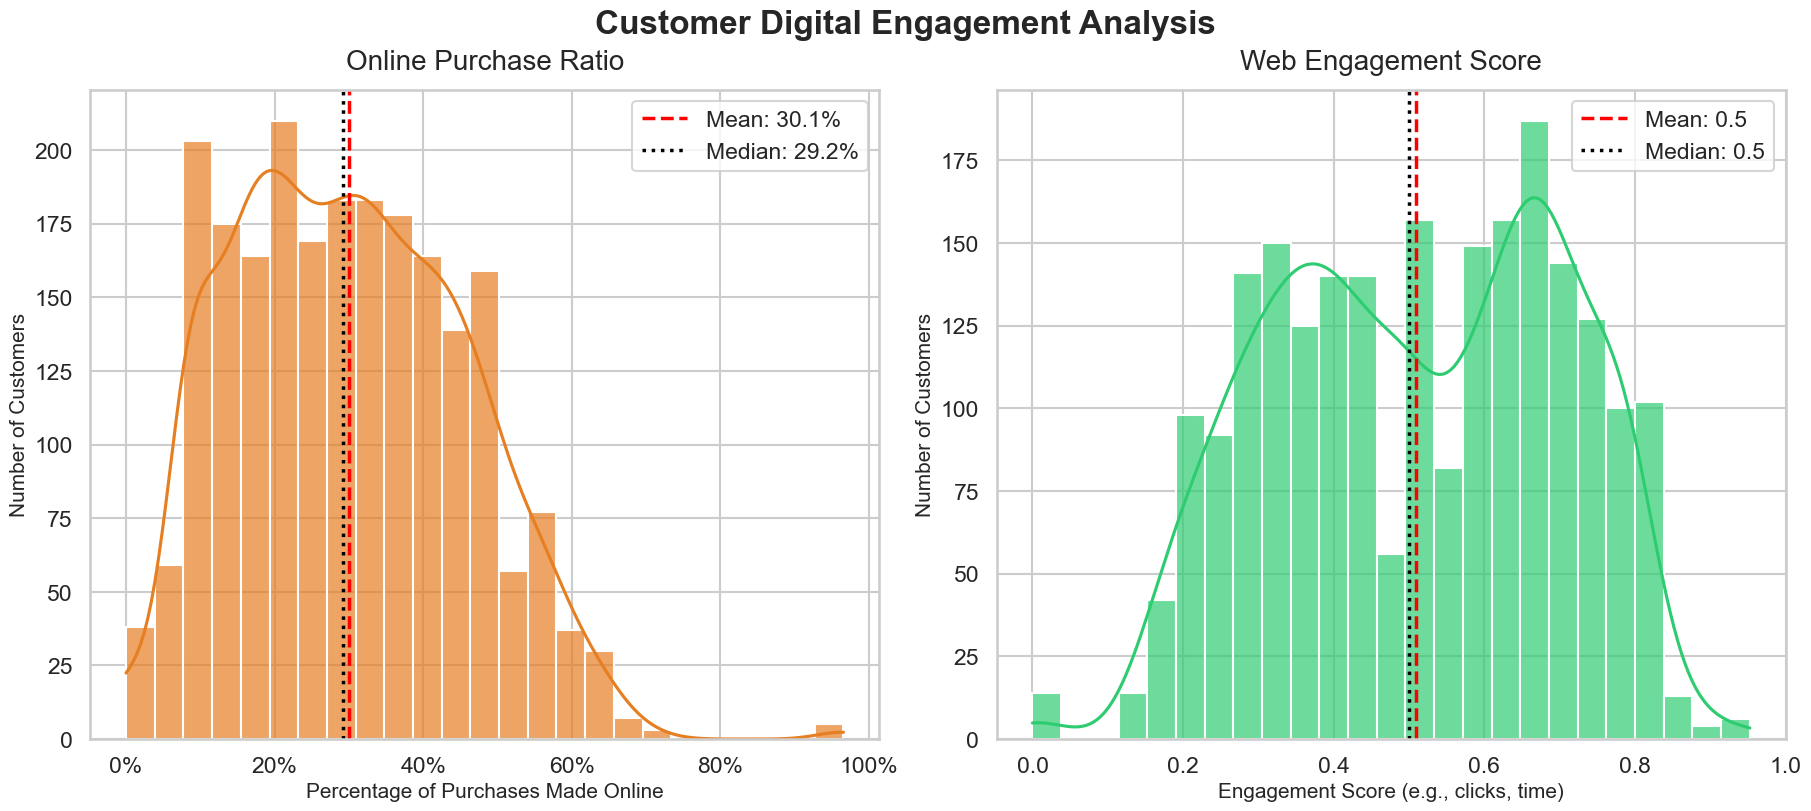

In [28]:
sns.set_style("whitegrid")
sns.set_context("talk")


fig, axes = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)


fig.suptitle('Customer Digital Engagement Analysis', fontsize=24, weight='bold')


# Online Purchase Ratio Distribution

ax1 = axes[0]
sns.histplot(data=df, x='online_purchase_ratio', bins=25, kde=True, ax=ax1, color="#E67E22", alpha=0.7)
ax1.set_title("Online Purchase Ratio", fontsize=20, pad=15)
ax1.set_xlabel("Percentage of Purchases Made Online", fontsize=15)
ax1.set_ylabel("Number of Customers", fontsize=15)


ax1.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


mean_ratio = df['online_purchase_ratio'].mean()
median_ratio = df['online_purchase_ratio'].median()
ax1.axvline(mean_ratio, color='red', linestyle='--', linewidth=2.5, label=f'Mean: {mean_ratio:.1%}')
ax1.axvline(median_ratio, color='black', linestyle=':', linewidth=2.5, label=f'Median: {median_ratio:.1%}')
ax1.legend() 


# Web Engagement Distribution

ax2 = axes[1]
sns.histplot(data=df, x='web_engagement', bins=25, kde=True, ax=ax2, color="#2ECC71", alpha=0.7)
ax2.set_title("Web Engagement Score", fontsize=20, pad=15)
ax2.set_xlabel("Engagement Score (e.g., clicks, time)", fontsize=15)
ax2.set_ylabel("Number of Customers", fontsize=15)


mean_eng = df['web_engagement'].mean()
median_eng = df['web_engagement'].median()
ax2.axvline(mean_eng, color='red', linestyle='--', linewidth=2.5, label=f'Mean: {mean_eng:.1f}')
ax2.axvline(median_eng, color='black', linestyle=':', linewidth=2.5, label=f'Median: {median_eng:.1f}')
ax2.legend()


plt.show()

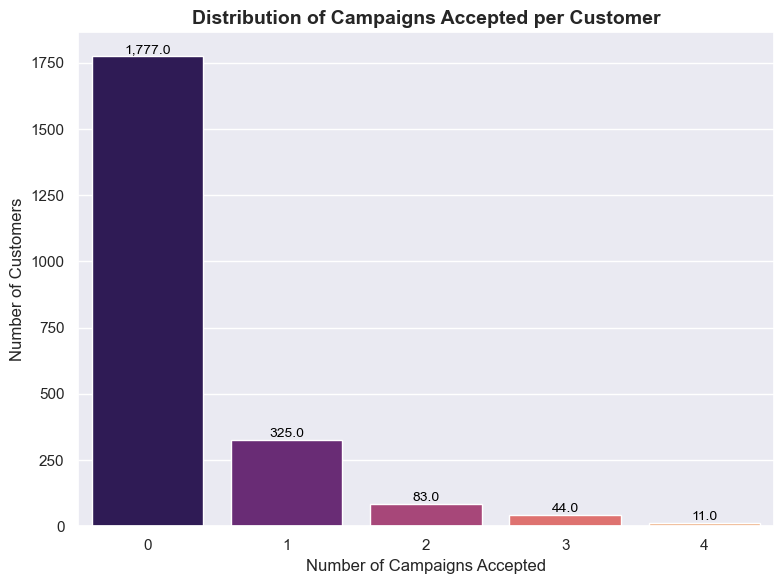

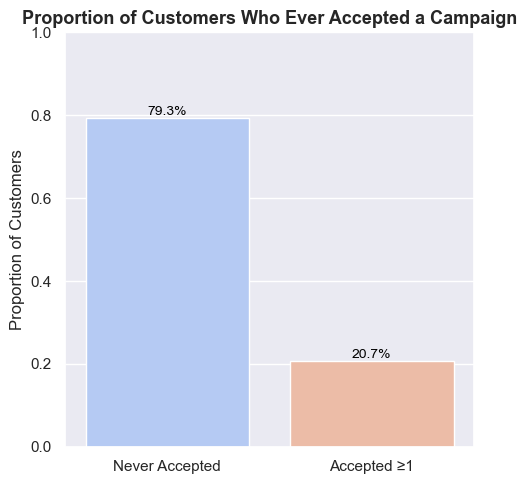

In [29]:

sns.set_theme(style="darkgrid")


plt.figure(figsize=(8,6))
ax = sns.countplot(x="campaigns_accepted", data=df, palette="magma")


for p in ax.patches:
    count = p.get_height()
    ax.annotate(f"{count:,}", (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, color="black")

plt.title("Distribution of Campaigns Accepted per Customer", fontsize=14, weight='bold')
plt.xlabel("Number of Campaigns Accepted")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


plt.figure(figsize=(5,5))


prop_df = df['ever_accepted'].value_counts(normalize=True).reset_index()
prop_df.columns = ['ever_accepted', 'proportion']

ax = sns.barplot(x="ever_accepted", y="proportion", data=prop_df,
                 palette="coolwarm")


ax.set_xticklabels(["Never Accepted", "Accepted ≥1"])


for p in ax.patches:
    proportion = p.get_height() * 100
    ax.annotate(f"{proportion:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black")

plt.title("Proportion of Customers Who Ever Accepted a Campaign", fontsize=13, weight='bold')
plt.ylabel("Proportion of Customers")
plt.xlabel("")
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

### Model Building & Evaluation
---

#### Train/Test Split

In [30]:
target_col = "target"

drop_cols = [
    "customer_date", "id", "minutes_wines", "minutes_fruits", "minutes_meat_products",
    "minutes_fish_products", "minutes_sweet_products", "minutes_gold_products",
    "num_deal_purchases", "num_web_purchases", "num_catalog_purchases",
    "num_store_purchases", "num_web_visit_months", "acc_campaign1", "acc_campaign2",
    "acc_campaign3", "acc_campaign4", "acc_campaign5", "contact_cost", "revenue"
]

drop_cols = [col for col in drop_cols if col in df.columns]

y = df[target_col]
X = df.drop(columns=drop_cols + [target_col], errors='ignore')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   birth_year             2240 non-null   int64  
 1   education              2240 non-null   object 
 2   marital_status         2240 non-null   object 
 3   income                 2240 non-null   float64
 4   kid_home               2240 non-null   int64  
 5   teen_home              2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   complain               2240 non-null   int64  
 8   age                    2240 non-null   int64  
 9   family_size            2240 non-null   int64  
 10  has_kids               2240 non-null   int64  
 11  total_spending         2240 non-null   int64  
 12  share_wines            2240 non-null   float64
 13  share_fruits           2240 non-null   float64
 14  share_meat_products    2240 non-null   float64
 15  shar

In [32]:
# Define correct feature lists (MUST match X_train.columns exactly!)
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

Numeric features: ['birth_year', 'income', 'kid_home', 'teen_home', 'recency', 'complain', 'age', 'family_size', 'has_kids', 'total_spending', 'share_wines', 'share_fruits', 'share_meat_products', 'share_fish_products', 'share_sweet_products', 'share_gold_products', 'total_purchases', 'online_purchase_ratio', 'web_engagement', 'campaigns_accepted', 'ever_accepted']
Categorical features: ['education', 'marital_status']


#### Models

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Extra imports for gradient boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Candidate models
models = {
    "log_reg": LogisticRegression(max_iter=1000, random_state=42),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42),
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "lgbm": LGBMClassifier(random_state=42)
}

# Example param grids (note the 'model__' prefix for pipeline)
param_grid = {
    "log_reg": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "model__class_weight": [None, "balanced"]
    },
    "decision_tree": {
        "model__max_depth": [3, 5, 10, None],
        "model__min_samples_split": [2, 5, 10],
        "model__class_weight": [None, "balanced"]
    },
    "random_forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [5, 10, None],
        "model__min_samples_split": [2, 5, 10],
        "model__class_weight": [None, "balanced"]
    },
    "xgboost": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5, 7],
        "model__learning_rate": [0.01, 0.1, 0.3],
        "model__subsample": [0.8, 1.0],
        "model__colsample_bytree": [0.8, 1.0]
    },
    "lgbm": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [-1, 5, 10],
        "model__learning_rate": [0.01, 0.1, 0.3],
        "model__num_leaves": [31, 50, 100],
        "model__subsample": [0.8, 1.0]
    }
}


In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1792, 23)
(448, 23)
(1792,)
(448,)


In [35]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score
)

best_models = {}
results = []

for name, model in models.items():
    print(f"\n🔎 Tuning {name}...")

    try:
        # Build pipeline
        pipe = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("model", model)
        ])

        # Grid search
        grid = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid[name],
            cv=5,
            scoring="roc_auc",
            n_jobs=-1,
            error_score="raise"
        )

        # Fit
        grid.fit(X_train, y_train)

        # Save best model
        best_models[name] = grid.best_estimator_

        # --- Evaluate on test set ---
        y_pred = best_models[name].predict(X_test)
        y_pred_proba = best_models[name].predict_proba(X_test)[:, 1]

        roc = roc_auc_score(y_test, y_pred_proba)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        results.append({
            "Model": name,
            "Best Params": grid.best_params_,
            "CV_ROC_AUC": grid.best_score_,
            "Test_ROC_AUC": roc,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1
        })

        print(f"✅ {name} | CV ROC-AUC: {grid.best_score_:.4f} | "
              f"Test ROC-AUC: {roc:.4f} | Acc: {acc:.4f} | "
              f"Prec: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

    except Exception as e:
        print(f"❌ {name} failed: {e}")
        results.append({
            "Model": name,
            "Best Params": str(e),
            "CV_ROC_AUC": None,
            "Test_ROC_AUC": None,
            "Accuracy": None,
            "Precision": None,
            "Recall": None,
            "F1": None
        })

# --- Build summary DataFrame ---
summary_df = pd.DataFrame(results).sort_values(by="Test_ROC_AUC", ascending=False)
print("\n📊 Model Comparison Summary:")
display(summary_df)


🔎 Tuning log_reg...
✅ log_reg | CV ROC-AUC: 0.8734 | Test ROC-AUC: 0.9047 | Acc: 0.8237 | Prec: 0.4524 | Recall: 0.8507 | F1: 0.5907

🔎 Tuning decision_tree...
✅ decision_tree | CV ROC-AUC: 0.7834 | Test ROC-AUC: 0.7630 | Acc: 0.6719 | Prec: 0.2872 | Recall: 0.8060 | F1: 0.4235

🔎 Tuning random_forest...
✅ random_forest | CV ROC-AUC: 0.8608 | Test ROC-AUC: 0.8696 | Acc: 0.8839 | Prec: 0.7273 | Recall: 0.3582 | F1: 0.4800

🔎 Tuning xgboost...
✅ xgboost | CV ROC-AUC: 0.8752 | Test ROC-AUC: 0.8917 | Acc: 0.8839 | Prec: 0.7419 | Recall: 0.3433 | F1: 0.4694

🔎 Tuning lgbm...
[LightGBM] [Info] Number of positive: 267, number of negative: 1525
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148996 -> initsc

,Model,Best Params,CV_ROC_AUC,Test_ROC_AUC,Accuracy,Precision,Recall,F1
0,log_reg,"{'model__C': 0.1, 'model__class_weight': 'bala...",0.873448,0.904670,0.823661,0.452381,0.850746,0.590674
4,lgbm,"{'model__learning_rate': 0.1, 'model__max_dept...",0.869759,0.892095,0.883929,0.727273,0.358209,0.480000
3,xgboost,"{'model__colsample_bytree': 1.0, 'model__learn...",0.875163,0.891742,0.883929,0.741935,0.343284,0.469388
2,random_forest,"{'model__class_weight': 'balanced', 'model__ma...",0.860797,0.869569,0.883929,0.727273,0.358209,0.480000
1,decision_tree,"{'model__class_weight': 'balanced', 'model__ma...",0.783405,0.762957,0.671875,0.287234,0.805970,0.423529


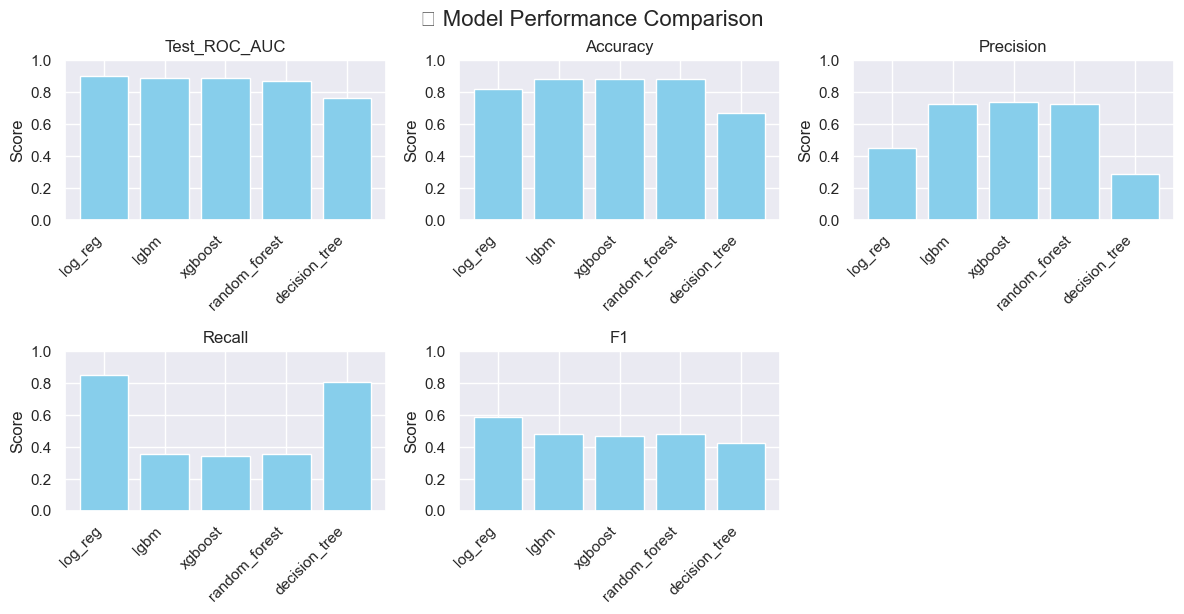

In [36]:
import matplotlib.pyplot as plt

# --- Plot model comparison ---
metrics = ["Test_ROC_AUC", "Accuracy", "Precision", "Recall", "F1"]

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 cols grid
    plt.bar(summary_df["Model"], summary_df[metric], color="skyblue")
    plt.title(metric, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # classification metrics are between 0–1

plt.tight_layout()
plt.suptitle("📊 Model Performance Comparison", fontsize=16, y=1.02)
plt.show()
